<a href="https://colab.research.google.com/github/dasunkasthury/Face_Recognition_with_tf_new/blob/master/notebook_script/Model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 182kcQznm2GlXW1Um29pw3nlnNY0xu-nz
!mkdir data
!unzip '/content/data_with_accurate_data(output).zip' -d '/content/data/'
!rm -r data_with_accurate_data(output).zip

Streaming output truncated to the last 5000 lines.
 extracting: /content/data/content/data/data_with_accurate_data/train/sad/Training_64402389.jpg  
 extracting: /content/data/content/data/data_with_accurate_data/train/sad/Training_55459543.jpg  
 extracting: /content/data/content/data/data_with_accurate_data/train/sad/Training_28774981.jpg  
 extracting: /content/data/content/data/data_with_accurate_data/train/sad/Training_23245687.jpg  
 extracting: /content/data/content/data/data_with_accurate_data/train/sad/Training_61262737.jpg  
 extracting: /content/data/content/data/data_with_accurate_data/train/sad/Training_27071247.jpg  
 extracting: /content/data/content/data/data_with_accurate_data/train/sad/Training_35062825.jpg  
 extracting: /content/data/content/data/data_with_accurate_data/train/sad/Training_62543221.jpg  
 extracting: /content/data/content/data/data_with_accurate_data/train/sad/Training_67385672.jpg  
 extracting: /content/data/content/data/data_with_accurate_data/tra

In [19]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)


print("GPU count ---------------------------------->>> ", gpus)

GPU count ---------------------------------->>>  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#import matplotlib as plt
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Reshape, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
import numpy as np
import json
import os
# import albumentations as alb
import time
import cv2
from tensorflow.keras.applications import ResNet152V2, VGG16

from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import img_to_array


In [20]:
import albumentations as alb

In [21]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

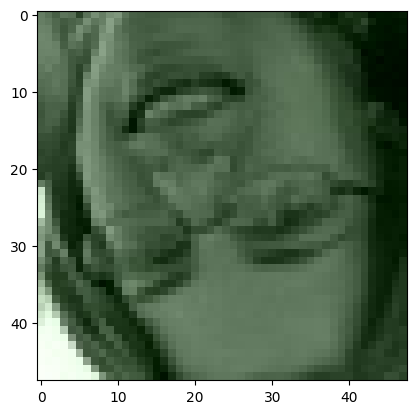

In [22]:
# for testing
# images1 = tf.data.Dataset.list_files('/content/data/content/data/data_with_accurate_data/aug/train/happy/*.jpg', shuffle=False)
images1 = tf.data.Dataset.list_files('./MSC/Project/content/data/data_with_accurate_data/aug/train/happy/*.jpg', shuffle=False)
images1 = images1.map(load_image)
plt.imshow(images1.as_numpy_iterator().next())

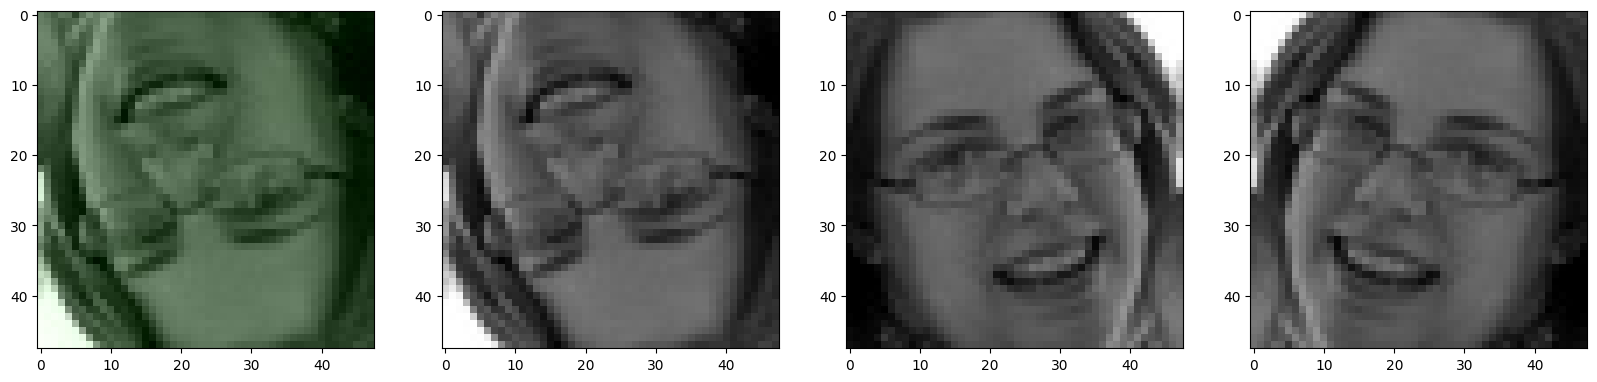

In [23]:
# for testing
image_generator1 = images1.batch(4).as_numpy_iterator()
plot_images1 = image_generator1.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image1 in enumerate(plot_images1):
    ax[idx].imshow(image1)
plt.show()

In [ ]:
# For data augmentation. since the data is already augmented no need to do again


# augmentor = alb.Compose([alb.HorizontalFlip(p=0.5),
#                          alb.RandomBrightnessContrast(p=0.2),
#                          alb.RandomGamma(p=0.2),
#                          alb.RGBShift(p=0.2),
#                          alb.VerticalFlip(p=0.5)],
#                        bbox_params=alb.BboxParams(format='albumentations',
#                                                   label_fields=['class_labels']))


In [ ]:
# # # For data augmentation. since the data is already augmented no need to do again
# # # generate new images with augmentation
# for partition in ['train']:
#   for emotions in ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']:
#       for image in os.listdir(os.path.join('/content/data/data_with_accurate_data/', partition, emotions)):
#           img = cv2.imread(os.path.join('/content/data/data_with_accurate_data/', partition, emotions, image))

#           coords = [0,0,0.00001,0.00001]

#           try:
#               for x in range(20):
#                   augmented = augmentor(image=img, bboxes=[coords], class_labels=[emotions])
#                   cv2.imwrite(os.path.join('/content/data/data_with_accurate_data/aug/', partition, emotions, f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

#                   annotation = {}
#                   annotation['image'] = image

#           except Exception as e:
#               print(e)

In [ ]:
# !zip -r '/content/data_with_accurate_data.zip' '/content/data/data_with_accurate_data' # this is to zip the data folder if we need to downloaad it

Streaming output truncated to the last 5000 lines.
  adding: content/data/data_with_accurate_data/train/sad/Training_55138367.jpg (stored 0%)
  adding: content/data/data_with_accurate_data/train/sad/Training_80204177.jpg (stored 0%)
  adding: content/data/data_with_accurate_data/train/sad/Training_64402389.jpg (stored 0%)
  adding: content/data/data_with_accurate_data/train/sad/Training_55459543.jpg (stored 0%)
  adding: content/data/data_with_accurate_data/train/sad/Training_28774981.jpg (stored 0%)
  adding: content/data/data_with_accurate_data/train/sad/Training_23245687.jpg (stored 0%)
  adding: content/data/data_with_accurate_data/train/sad/Training_61262737.jpg (stored 0%)
  adding: content/data/data_with_accurate_data/train/sad/Training_27071247.jpg (stored 0%)
  adding: content/data/data_with_accurate_data/train/sad/Training_35062825.jpg (stored 0%)
  adding: content/data/data_with_accurate_data/train/sad/Training_62543221.jpg (stored 0%)
  adding: content/data/data_with_accura

In [ ]:
# train_images = tf.data.Dataset.list_files('/content/data/train/angry/*.jpg', shuffle=False) # this will get all the jpg images inside the folder
# train_images = train_images.map(load_image) # this will call the given func to all the images
# train_images = train_images.map(lambda x: tf.image.resize(x, (250,250))) # this will resize the imge to gigen size
# train_images = train_images.map(lambda x: x/255)

(250, 250, 1)

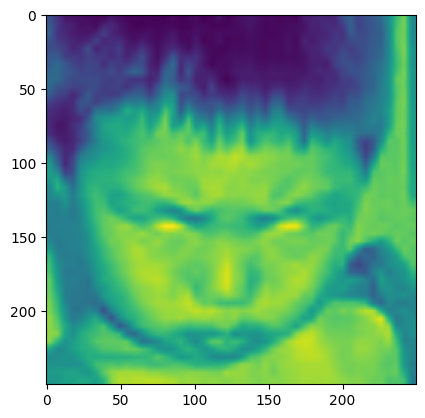

In [ ]:
# #train_images.as_numpy_iterator().next() # this will print the image in numbers
# plt.imshow(train_images.as_numpy_iterator().next()) # to plot the image
# train_images.as_numpy_iterator().next().shape # to get the size of the image


In [ ]:
# test_images = tf.data.Dataset.list_files('/content/data/test/angry/*.jpg', shuffle=False) # this will get all the jpg images inside the folder
# test_images = test_images.map(load_image) # this will call the given func to all the images
# test_images = test_images.map(lambda x: tf.image.resize(x, (250,250))) # this will resize the imge to gigen size
# test_images = test_images.map(lambda x: x/255)

(250, 250, 1)

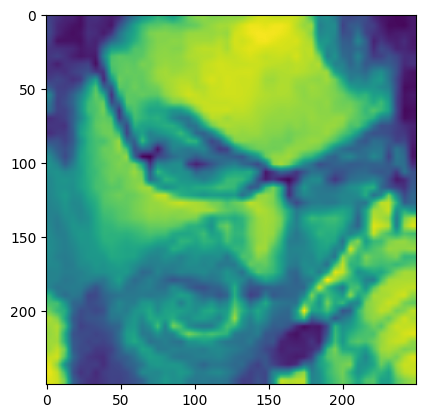

In [ ]:
# #train_images.as_numpy_iterator().next() # this will print the image in numbers
# plt.imshow(test_images.as_numpy_iterator().next()) # to plot the image
# test_images.as_numpy_iterator().next().shape # to get the size of the image

In [24]:
data_gen = ImageDataGenerator(validation_split=0.2)
path_to_data = './MSC/Project/content/data/data_with_accurate_data/aug/train'

training_set = data_gen.flow_from_directory(path_to_data,(48,48),color_mode='grayscale', subset="training")
testing_set = data_gen.flow_from_directory(path_to_data,(48,48),color_mode='grayscale', subset="validation")

Found 455872 images belonging to 7 classes.
Found 113968 images belonging to 7 classes.


In [25]:
# Get the class indices (mapping of class names to indices)
class_indices = training_set.class_indices
print("Class Indices:", class_indices)

# Get the class labels for all images
class_labels = training_set.classes

# Count the number of images in each class
unique, counts = np.unique(class_labels, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Map class indices back to class names
class_names = {v: k for k, v in class_indices.items()}
class_distribution_named = {class_names[k]: v for k, v in class_distribution.items()}

# Print the number of images in each class
print("Number of images in each class (by index):", class_distribution)
print("Number of images in each class (by name):", class_distribution_named)

Class Indices: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Number of images in each class (by index): {0: 63552, 1: 6960, 2: 65360, 3: 115184, 4: 77392, 5: 76912, 6: 50512}
Number of images in each class (by name): {'angry': 63552, 'disgust': 6960, 'fear': 65360, 'happy': 115184, 'neutral': 77392, 'sad': 76912, 'surprise': 50512}


In [26]:
print(training_set.class_indices)
print(training_set.batch_size)
labels = ["angry","disgust","fear","happy","neutral","sad","surprise"]

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
32


In [27]:
from PIL import Image
print("Pillow is installed and working!")

Pillow is installed and working!


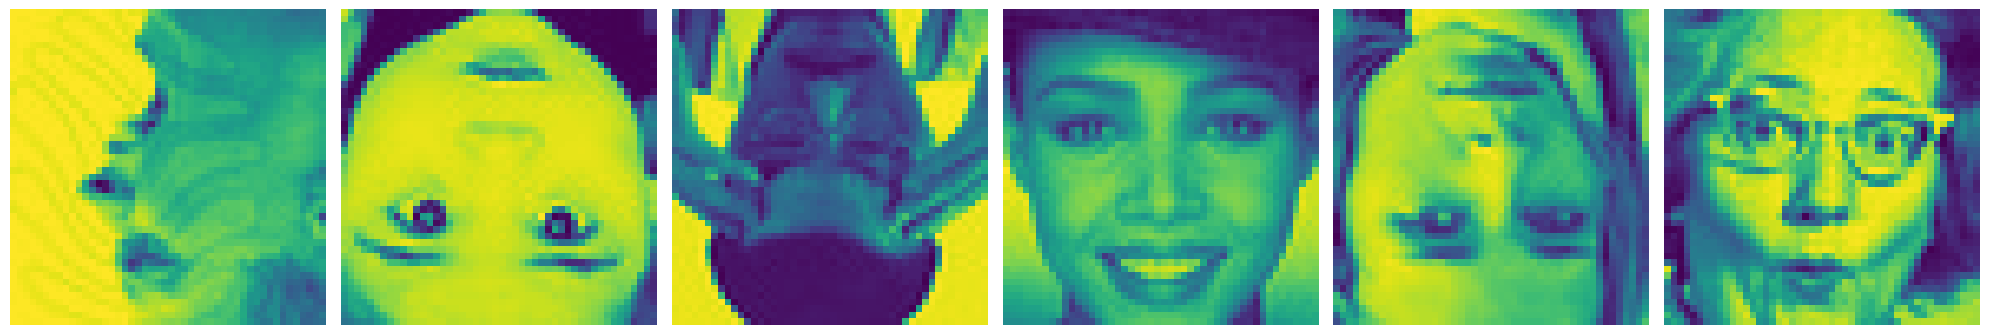

In [28]:
def plotImages(image_arr):
  fig, axes = plt.subplots(1, 6, figsize=(20,20))
  for img, ax in zip(image_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()
training_images, _ = next(training_set)
plotImages(training_images[:6])

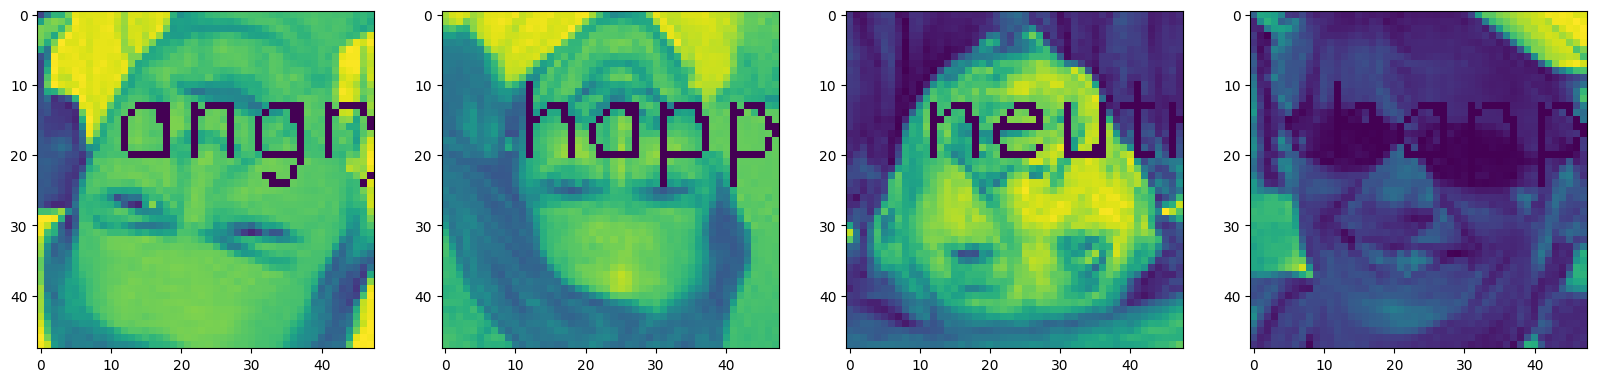

In [29]:
#test
# data_samples2 = next(training_set)
res = next(training_set)

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
  sample_imagess = res[0][idx].copy()
  sample_emotion = labels[np.argmax(res[1][idx])]

  position = (10, 20)  # (x, y) coordinates
  font = cv2.FONT_HERSHEY_SIMPLEX
  font_scale = 0.5
  color = (0, 0, 0)  # Black color in BGR
  thickness = 1

  cv2.putText(sample_imagess, sample_emotion, position, font, font_scale, color, thickness)

  ax[idx].imshow(sample_imagess)

In [30]:
res[0].shape

(32, 48, 48, 1)

In [31]:
vgg = VGG16(include_top=False) # originally it used ssd the move to vgg16

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [35]:
from sklearn.utils.class_weight import compute_class_weight

# Assuming you have the class labels for your training data
# Replace `training_set.classes` with the array of class labels from your dataset
class_labels = training_set.classes  # This contains the class indices for all images

# Get the unique class indices and their corresponding weights
class_weights = compute_class_weight(
    class_weight='balanced',  # Automatically balance weights
    classes=np.unique(class_labels),  # Unique class indices
    y=class_labels  # Class labels for all samples
)

# Convert the result to a dictionary
class_weights_dict = dict(enumerate(class_weights))

print("Class Weights:", class_weights_dict)

Class Weights: {0: 1.0247446410588406, 1: 9.356978653530378, 2: 0.9963979716733695, 3: 0.5653959875379517, 4: 0.8414897073156324, 5: 0.8467413593271716, 6: 1.289289108104439}


In [33]:
#######################################         ----------------------- MODEL 2 ------------------------------------------

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Modify the input layer to accept grayscale images
input_layer = Input(shape=(48, 48, 1))
x = tf.keras.layers.Concatenate()([input_layer, input_layer, input_layer])  # Convert 1 channel to 3

# Pass the input through the base model
x = base_model(x, training=False)

# Add custom layers on top
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(8, activation='relu')(x)
output_layer = Dense(7, activation='softmax')(x)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 48, 48, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 48, 48, 3) │          0 │ input_layer_4[0]… │
│ (Concatenate)       │                   │            │ input_layer_4[0]… │
│                     │                   │            │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 1, 1, 512) │ 14,714,688 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 512)       │          0 │ vgg16[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 256)       │    131,328 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 128)       │     32,896 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │      8,256 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 8)         │        520 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 7)         │         63 │ dense_7[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,887,751 (56.79 MB)

 Trainable params: 14,887,751 (56.79 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history_Model2 = model.fit(
    training_set,
    epochs=10,
    validation_data=testing_set,
    batch_size=32,
    steps_per_epoch=700,
    validation_steps=200, #validation_samples // batch_size
    callbacks=[early]
    )

Epoch 1/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 120s 162ms/step - accuracy: 0.1643 - loss: 130858888.0000 - val_accuracy: 0.1872 - val_loss: 1957123.3750
Epoch 2/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 112s 160ms/step - accuracy: 0.1730 - loss: 2407920.2500 - val_accuracy: 0.2047 - val_loss: 2105209.0000
Epoch 3/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 112s 160ms/step - accuracy: 0.1733 - loss: 2297743.0000 - val_accuracy: 0.1325 - val_loss: 2098930.7500
Epoch 4/10
476/700 ━━━━━━━━━━━━━━━━━━━━ 34s 156ms/step - accuracy: 0.1701 - loss: 2284551.0000

KeyboardInterrupt: 

In [ ]:
layer1 = Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 1))
layer2 = BatchNormalization()

In [ ]:
layer2

<BatchNormalization name=batch_normalization, built=False>

In [ ]:
#######################################         ----------------------- MODEL 3 ------------------------------------------

# initialising the CNN
face_recognition_model_2 = Sequential()

# convolution to extract features from images
# conv1
face_recognition_model_2.add(Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 1)))
face_recognition_model_2.add(BatchNormalization())

# conv2
face_recognition_model_2.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
face_recognition_model_2.add(BatchNormalization())
face_recognition_model_2.add(MaxPooling2D((2, 2)))

# conv3
face_recognition_model_2.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
face_recognition_model_2.add(BatchNormalization())


# conv4
face_recognition_model_2.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
face_recognition_model_2.add(BatchNormalization())
face_recognition_model_2.add(MaxPooling2D((2, 2)))

# conv5
face_recognition_model_2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
face_recognition_model_2.add(BatchNormalization())

# conv6
face_recognition_model_2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
face_recognition_model_2.add(BatchNormalization())
face_recognition_model_2.add(MaxPooling2D((2, 2)))

# flatten
face_recognition_model_2.add(Flatten())

# fc1
face_recognition_model_2.add(Dense(512, activation='relu'))
face_recognition_model_2.add(BatchNormalization())

# fc2
face_recognition_model_2.add(Dense(256, activation='relu'))
face_recognition_model_2.add(BatchNormalization())

# fc3
face_recognition_model_2.add(Dense(128, activation='relu'))
face_recognition_model_2.add(BatchNormalization())

# out
face_recognition_model_2.add(Dense(7, activation='softmax'))


face_recognition_model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# show summary of the created model
face_recognition_model_2.summary()


















Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 256)       │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 256)       │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 128, 128, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128, 128, 256)       │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 64, 64, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 9,707,399 (37.03 MB)

 Trainable params: 9,703,815 (37.02 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [ ]:
#######################################         ----------------------- MODEL 4 ------------------------------------------

face_recognition_model_3 = tf.keras.models.Sequential([
    # 1st conv
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(48, 48, 1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
    # 2nd conv
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
     # 3rd conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 4th conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 5th Conv
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # To Flatten layer
  tf.keras.layers.Flatten(),
  # To FC layer 1
  tf.keras.layers.Dense(4096, activation='relu'),
    # add dropout 0.5 ==> tf.keras.layers.Dropout(0.5),
  #To FC layer 2
  tf.keras.layers.Dense(4096, activation='relu'),
    # add dropout 0.5 ==> tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(7, activation='sigmoid')
])

In [ ]:
data_dir2 = pathlib.Path("../input/emotion-detection-fer/test")

BATCH_SIZE = 32             # Can be of size 2^n, but not restricted to. for the better utilization of memory
IMG_HEIGHT = 227            # input Shape required by the model
IMG_WIDTH = 227             # input Shape required by the model
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

# Rescalingthe pixel values from 0~255 to 0~1 For RGB Channels of the image.
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
# training_data for model training
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH), #Resizing the raw dataset
                                                     classes = list(CLASS_NAMES))

val_data_gen = image_generator.flow_from_directory(directory=str(data_dir2),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH), #Resizing the raw dataset
                                                     classes = list(CLASS_NAMES))

In [ ]:
face_recognition_model_3.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.SensitivityAtSpecificity(0.5), tf.keras.metrics.SpecificityAtSensitivity(0.5), tf.keras.metrics.AUC(curve='ROC')])

# Summarizing the model architecture and printing it out
face_recognition_model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 10, 10, 96)        11712     
                                                                 
 batch_normalization (Batch  (None, 10, 10, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 5, 5, 96)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 256)         2973952   
                                                                 
 batch_normalization_1 (Bat  (None, 5, 5, 256)         1024      
 chNormalization)                                                
                                                        

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) # fit is going to trigger def train_step(self, batch, **kwargs):

# history = face_recognition_model_3.fit(training_set, epochs=150, batch_size=64, validation_data=testing_set,steps_per_epoch=300, callbacks=[early])

batch_size = 10
validation_samples = 30
validation_steps = validation_samples // batch_size  # This should be 3 if

hist = face_recognition_model_3.fit(
    training_set,
    epochs=100,
    batch_size=64,
    validation_data=testing_set,
    steps_per_epoch=300,
    validation_steps=4,  # Use 3 steps to validate 30 samples
    callbacks=[tensorboard_callback]
    )

Epoch 1/100
300/300 [==============================] - ETA: 0s - loss: 1.7889 - accuracy: 0.2467 - precision_1: 0.1817 - recall_1: 0.8749 - sensitivity_at_specificity_1: 0.7100 - specificity_at_sensitivity_1: 0.6694 - auc_1: 0.6578

KeyboardInterrupt: 

In [ ]:
300//64


4

Class Weights: {0: 1.0247446410588406, 1: 9.356978653530378, 2: 0.9963979716733695, 3: 0.5653959875379517, 4: 0.8414897073156324, 5: 0.8467413593271716, 6: 1.289289108104439}


In [ ]:
#######################################         ----------------------- MODEL 5 ------------------------------------------
import keras

early = EarlyStopping(monitor='val_loss', patience=5)

face_recognition_model_5 = keras.Sequential()

face_recognition_model_5.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1), padding='same',kernel_regularizer='l2'))
face_recognition_model_5.add(Conv2D(64, (3, 3), activation='relu',kernel_regularizer='l2'))
face_recognition_model_5.add(BatchNormalization())
face_recognition_model_5.add(MaxPooling2D(pool_size=(2, 2))) #max pooling to decrease dimension
face_recognition_model_5.add(Dropout(0.25)) #test

face_recognition_model_5.add(Conv2D(128, (3, 3), activation='relu',kernel_regularizer='l2'))
face_recognition_model_5.add(BatchNormalization())
face_recognition_model_5.add(MaxPooling2D(pool_size=(2, 2))) #max pooling to decrease dimension
face_recognition_model_5.add(Conv2D(128, (3, 3), activation='relu',kernel_regularizer='l2'))
face_recognition_model_5.add(BatchNormalization())
face_recognition_model_5.add(Dropout(0.25))

face_recognition_model_5.add(Flatten())

face_recognition_model_5.add(Dense(1024, activation = 'relu',kernel_regularizer='l2'))
face_recognition_model_5.add(Dropout(0.5))
face_recognition_model_5.add(Dense(7, activation = 'softmax'))


# compile
face_recognition_model_5.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001),loss=keras.losses.CategoricalCrossentropy(),metrics=['acc'])

early = EarlyStopping(monitor='val_loss',patience=10)

face_recognition_model_5.summary()

/opt/anaconda3/envs/tensorflow_env_conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,638,343 (32.95 MB)

 Trainable params: 8,637,703 (32.95 MB)

 Non-trainable params: 640 (2.50 KB)

In [ ]:
history_new = face_recognition_model_5.fit(
    training_set,
    epochs=100,
    validation_data=testing_set,
    batch_size=32,
    steps_per_epoch=14246,
    validation_steps=3561, #validation_samples // batch_size
    callbacks=[early],
    class_weight=class_weights_dict  # Pass the class weights here
    )



Epoch 1/100


/opt/anaconda3/envs/tensorflow_env_conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-01-07 22:24:01.455446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-01-07 22:24:01.813734: W tensorflow/core/framework/op_kernel.cc:1827] INVALID_ARGUMENT: TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32, tf.float32, tf.float32), but the yielded element was (array([[[[ 54.],
         [ 56.],
         [ 58.],
         ...,
         [ 15.],
         [ 21.],
         [ 24.]],

        [[ 55.],
         [ 62.],
         [ 65.],
  

InvalidArgumentError: Graph execution error:

2 root error(s) found.
  (0) INVALID_ARGUMENT:  TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32, tf.float32, tf.float32), but the yielded element was (array([[[[ 54.],
         [ 56.],
         [ 58.],
         ...,
         [ 15.],
         [ 21.],
         [ 24.]],

        [[ 55.],
         [ 62.],
         [ 65.],
         ...,
         [ 16.],
         [ 18.],
         [ 22.]],

        [[ 54.],
         [ 60.],
         [ 52.],
         ...,
         [ 23.],
         [ 22.],
         [ 27.]],

        ...,

        [[ 54.],
         [126.],
         [211.],
         ...,
         [ 94.],
         [ 72.],
         [ 74.]],

        [[ 22.],
         [ 89.],
         [111.],
         ...,
         [ 85.],
         [ 76.],
         [ 87.]],

        [[ 22.],
         [ 33.],
         [ 23.],
         ...,
         [ 97.],
         [ 76.],
         [ 79.]]],


       [[[ 45.],
         [ 43.],
         [ 45.],
         ...,
         [  9.],
         [ 10.],
         [  7.]],

        [[ 44.],
         [ 46.],
         [ 48.],
         ...,
         [  9.],
         [  7.],
         [  9.]],

        [[ 45.],
         [ 45.],
         [ 46.],
         ...,
         [ 11.],
         [  7.],
         [  9.]],

        ...,

        [[123.],
         [108.],
         [113.],
         ...,
         [ 23.],
         [ 24.],
         [ 23.]],

        [[125.],
         [111.],
         [100.],
         ...,
         [ 25.],
         [ 23.],
         [ 13.]],

        [[108.],
         [117.],
         [100.],
         ...,
         [ 28.],
         [ 27.],
         [ 12.]]],


       [[[  3.],
         [  3.],
         [  8.],
         ...,
         [ 12.],
         [  9.],
         [  8.]],

        [[  7.],
         [  6.],
         [ 11.],
         ...,
         [  6.],
         [ 11.],
         [  5.]],

        [[ 13.],
         [ 15.],
         [ 14.],
         ...,
         [  8.],
         [  9.],
         [  6.]],

        ...,

        [[  2.],
         [ 13.],
         [ 14.],
         ...,
         [ 26.],
         [ 24.],
         [ 45.]],

        [[  4.],
         [ 10.],
         [ 11.],
         ...,
         [ 43.],
         [ 24.],
         [ 12.]],

        [[  8.],
         [  8.],
         [ 26.],
         ...,
         [ 90.],
         [ 40.],
         [  3.]]],


       ...,


       [[[ 59.],
         [ 58.],
         [ 51.],
         ...,
         [ 69.],
         [ 69.],
         [ 76.]],

        [[ 61.],
         [ 60.],
         [ 52.],
         ...,
         [ 69.],
         [ 70.],
         [ 78.]],

        [[ 58.],
         [ 58.],
         [ 50.],
         ...,
         [ 70.],
         [ 70.],
         [ 75.]],

        ...,

        [[160.],
         [125.],
         [100.],
         ...,
         [107.],
         [118.],
         [119.]],

        [[160.],
         [145.],
         [122.],
         ...,
         [107.],
         [114.],
         [113.]],

        [[160.],
         [164.],
         [123.],
         ...,
         [134.],
         [130.],
         [144.]]],


       [[[  0.],
         [  0.],
         [  0.],
         ...,
         [  0.],
         [  1.],
         [  0.]],

        [[  0.],
         [  0.],
         [  0.],
         ...,
         [  1.],
         [  4.],
         [  1.]],

        [[  0.],
         [  0.],
         [  0.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        ...,

        [[136.],
         [ 35.],
         [  1.],
         ...,
         [  0.],
         [  0.],
         [  1.]],

        [[ 99.],
         [  0.],
         [  0.],
         ...,
         [  2.],
         [  1.],
         [  0.]],

        [[ 39.],
         [  2.],
         [  1.],
         ...,
         [  0.],
         [  0.],
         [  0.]]],


       [[[162.],
         [116.],
         [146.],
         ...,
         [200.],
         [195.],
         [198.]],

        [[128.],
         [132.],
         [137.],
         ...,
         [204.],
         [199.],
         [199.]],

        [[141.],
         [146.],
         [128.],
         ...,
         [200.],
         [203.],
         [203.]],

        ...,

        [[177.],
         [111.],
         [ 75.],
         ...,
         [183.],
         [184.],
         [189.]],

        [[175.],
         [167.],
         [104.],
         ...,
         [185.],
         [185.],
         [190.]],

        [[171.],
         [169.],
         [162.],
         ...,
         [183.],
         [185.],
         [196.]]]], dtype=float32), array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.]], dtype=float32)).
Traceback (most recent call last):

  File "/opt/anaconda3/envs/tensorflow_env_conda/lib/python3.10/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 204, in generator_py_func
    flattened_values = nest.flatten_up_to(output_types, values)

  File "/opt/anaconda3/envs/tensorflow_env_conda/lib/python3.10/site-packages/tensorflow/python/data/util/nest.py", line 237, in flatten_up_to
    return nest_util.flatten_up_to(

  File "/opt/anaconda3/envs/tensorflow_env_conda/lib/python3.10/site-packages/tensorflow/python/util/nest_util.py", line 1541, in flatten_up_to
    return _tf_data_flatten_up_to(shallow_tree, input_tree)

  File "/opt/anaconda3/envs/tensorflow_env_conda/lib/python3.10/site-packages/tensorflow/python/util/nest_util.py", line 1570, in _tf_data_flatten_up_to
    _tf_data_assert_shallow_structure(shallow_tree, input_tree)

  File "/opt/anaconda3/envs/tensorflow_env_conda/lib/python3.10/site-packages/tensorflow/python/util/nest_util.py", line 1427, in _tf_data_assert_shallow_structure
    raise ValueError(

ValueError: The two structures don't have the same sequence length. Input structure has length 2, while shallow structure has length 3.


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "/opt/anaconda3/envs/tensorflow_env_conda/lib/python3.10/site-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/opt/anaconda3/envs/tensorflow_env_conda/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/opt/anaconda3/envs/tensorflow_env_conda/lib/python3.10/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 206, in generator_py_func
    raise TypeError(

TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32, tf.float32, tf.float32), but the yielded element was (array([[[[ 54.],
         [ 56.],
         [ 58.],
         ...,
         [ 15.],
         [ 21.],
         [ 24.]],

        [[ 55.],
         [ 62.],
         [ 65.],
         ...,
         [ 16.],
         [ 18.],
         [ 22.]],

        [[ 54.],
         [ 60.],
         [ 52.],
         ...,
         [ 23.],
         [ 22.],
        [Op:__inference_multi_step_on_iterator_2177]

Text(0.5, 1.0, 'Training and validation loss')

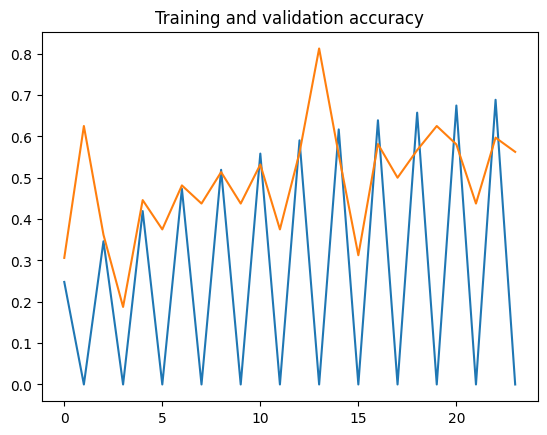

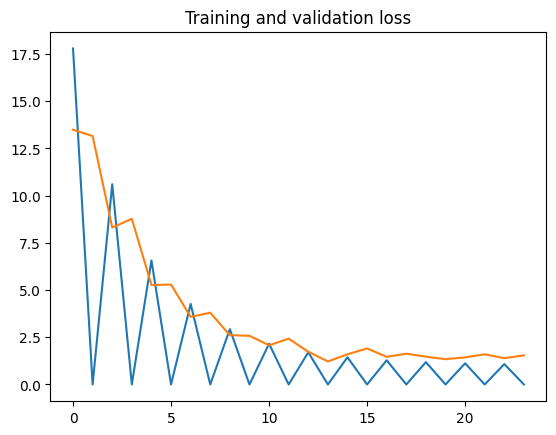

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history_new.history['acc']
val_acc = history_new.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history_new.history['loss']
val_loss = history_new.history['val_loss']

# Get number of epochs
# using the minimum length to ensure both lists have the same length
epochs = range(min(len(acc), len(val_acc)))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc[:len(epochs)]) # Slice acc to match epochs length
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss[:len(epochs)]) # Slice loss to match epochs length
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
face_recognition_model_5.save('/content/face_emotion_tracker_with_weight_new_0.68A.h5')

In [ ]:
# adding model accuracy validation steps ************************************************************************************************************************************************************************************

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras import layers

img_input = layers.Input(shape=(48, 48, 1))

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in face_recognition_model_5.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

NameError: name 'train_cat_fnames' is not defined

Text(0.5, 1.0, 'Training and validation loss')

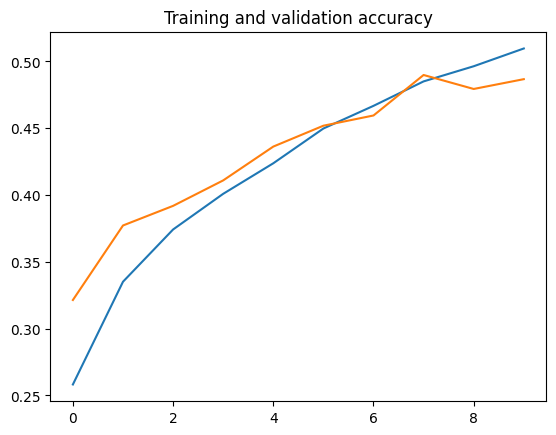

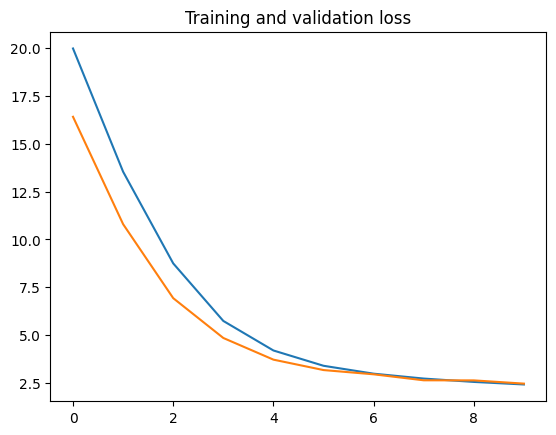

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history_new.history['acc']
val_acc = history_new.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history_new.history['loss']
val_loss = history_new.history['val_loss']

# Get number of epochs
# using the minimum length to ensure both lists have the same length
epochs = range(min(len(acc), len(val_acc)))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc[:len(epochs)]) # Slice acc to match epochs length
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss[:len(epochs)]) # Slice loss to match epochs length
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
# End model accuracy validation steps  ***************************************************************************************************************************************************************************************

In [ ]:
# for model 5 only
hist = face_recognition_model_5.fit(training_set,epochs=250,batch_size=64,validation_data=testing_set,steps_per_epoch=300,callbacks=[early])

Epoch 1/250


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


300/300 ━━━━━━━━━━━━━━━━━━━━ 2200s 7s/step - acc: 0.2132 - loss: 22.9690 - val_acc: 0.1735 - val_loss: 20.2682
Epoch 2/250
300/300 ━━━━━━━━━━━━━━━━━━━━ 2121s 7s/step - acc: 0.2649 - loss: 19.8555 - val_acc: 0.2995 - val_loss: 17.6423
Epoch 3/250
300/300 ━━━━━━━━━━━━━━━━━━━━ 2043s 7s/step - acc: 0.2908 - loss: 17.0643 - val_acc: 0.3305 - val_loss: 15.0692
Epoch 4/250
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 761ms/step - acc: 0.3227 - loss: 14.5922

In [ ]:
history = face_recognition_model_3.fit(training_set, epochs=15, validation_data=testing_set, callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2))

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


718/718 ━━━━━━━━━━━━━━━━━━━━ 83s 93ms/step - accuracy: 0.2292 - auc_1: 0.6298 - loss: 4.2727 - precision_1: 0.1743 - recall_1: 0.8615 - sensitivity_at_specificity_1: 0.6808 - specificity_at_sensitivity_1: 0.6560 - val_accuracy: 0.2768 - val_auc_1: 0.6761 - val_loss: 1.7651 - val_precision_1: 0.1808 - val_recall_1: 0.8913 - val_sensitivity_at_specificity_1: 0.7264 - val_specificity_at_sensitivity_1: 0.7115
Epoch 2/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 47s 65ms/step - accuracy: 0.3026 - auc_1: 0.6892 - loss: 1.7295 - precision_1: 0.1865 - recall_1: 0.8945 - sensitivity_at_specificity_1: 0.7496 - specificity_at_sensitivity_1: 0.7223 - val_accuracy: 0.3120 - val_auc_1: 0.6967 - val_loss: 1.7288 - val_precision_1: 0.1922 - val_recall_1: 0.8455 - val_sensitivity_at_specificity_1: 0.7535 - val_specificity_at_sensitivity_1: 0.7295
Epoch 3/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 47s 65ms/step - accuracy: 0.3492 - auc_1: 0.7317 - loss: 1.6419 - precision_1: 0.2037 - recall_1: 0.8663 - sensitivity_at_specifici

In [ ]:
def plot_hist(history):
    plt.plot(history.history["acc"], color='red')
    plt.plot(history.history["loss"], color='blue')
    plt.plot(history.history["val_acc"], color='orange')
    # plt.plot(history.history["loss"],color='green')
    plt.plot(history.history["val_loss"],color='olive')
    # plt.plot(history.history["recall_1"],color='violet')
    # plt.plot(history.history["specificity_at_sensitivity_1"],color='purple')

    # plt.plot(history.history["val_accuracy"],color='cyan')
    # plt.plot(history.history["val_auc_1"],color='yellow')

    plt.title("Metrics")

    plt.legend(["acc","loss","val_acc", "val_loss" ], bbox_to_anchor =(0.65, 1.00))
    plt.show()


plot_hist(history_new)

NameError: name 'history_new' is not defined

In [ ]:
history = model.fit(training_set, epochs=15, validation_data=testing_set, callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2))

In [ ]:
face_recognition_model_5.save('/content/face_emotion_tracker_8E.h5')
# face_recognition_model.save_weights('/content/emotion_recog_model.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
angry


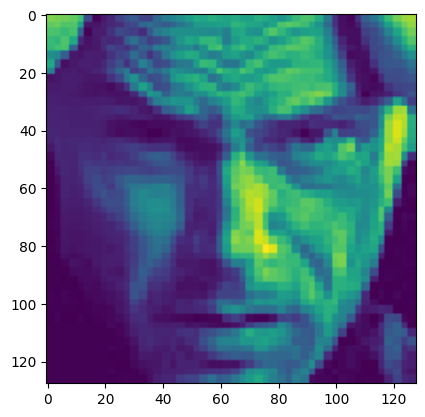

In [ ]:
# images2 = tf.data.Dataset.list_files('/content/data/train/angry/*.jpg', shuffle=False)
# images2 = images1.map(load_image)

testing_image = image.load_img('/content/data/test/fear/PrivateTest_10254684.jpg', color_mode='grayscale', target_size=(128,128))
plt.imshow(testing_image)

testing_image = image.img_to_array(testing_image)
testing_image = np.expand_dims(testing_image, axis=0)


#print(testing_image.shape)

prediction_result = face_recognition_model_3.predict(testing_image)

print(labels[np.argmax(prediction_result)])


In [ ]:
test_data = next(testing_set)


In [ ]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                       bbox_params=alb.BboxParams(format='albumentations',
                                                  label_fields=['class_labels']))

In [ ]:
# generate new images with augmentation
for partition in ['train','test']:
    for image in os.listdir(os.path.join('/content/data/', partition, 'images')):
        img = cv2.imread(os.path.join('/content/data/', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('/content/data/', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('/content/data/aug_data/', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0


                with open(os.path.join('/content/data/aug_data/', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)